In [1]:
# Import Libaries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
#Load Twitter
Twitter_Data = pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\Twitter NLP\training.1600000.processed.noemoticon.csv" ,encoding = 'mbcs') 


In [3]:
Twitter_Data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
#Remove uneeded columns and remove duplicated and null values 
Twitter_Data=Twitter_Data.drop(['0','Mon Apr 06 22:19:45 PDT 2009','NO_QUERY','_TheSpecialOne_'], axis=1)
Twitter_Data = Twitter_Data.drop_duplicates()
Twitter_Data=Twitter_Data.dropna(axis=0)

In [5]:
Twitter_Data.head()

,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1467810672,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...
2,1467811184,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all...."
4,1467811372,@Kwesidei not the whole crew


In [6]:
Twitter_Data.columns=['ID','Tweet']

In [7]:
Twitter_Data.head()

,ID,Tweet
0,1467810672,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...
2,1467811184,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all...."
4,1467811372,@Kwesidei not the whole crew


In [8]:
Twitter_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598314 entries, 0 to 1599998
Data columns (total 2 columns):
ID       1598314 non-null int64
Tweet    1598314 non-null object
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


### Data Transformation 

In [9]:
## Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [10]:
## Create a new column of the new parsed tweets
Twitter_Data['cleaned_tweet'] = Twitter_Data['Tweet'].apply(lambda x: html_parser.unescape(x))
Twitter_Data.head(10)

C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  


,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
4,1467811372,@Kwesidei not the whole crew,@Kwesidei not the whole crew
5,1467811592,Need a hug,Need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,@LOLTrish hey long time no see! Yes.. Rains a...
7,1467811795,@Tatiana_K nope they didn't have it,@Tatiana_K nope they didn't have it
8,1467812025,@twittera que me muera ?,@twittera que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it's snowing


In [11]:
## Create a function to remove the @user the tweets

def remove_user(txt, user):
    r = re.findall(user, txt)
    for i in r:
        txt = re.sub(i, '', txt)
    return txt

In [12]:
Twitter_Data['cleaned_tweet'] = np.vectorize(remove_user)(Twitter_Data['cleaned_tweet'], "@[\w]*")
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,Need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! Yes.. Rains a bit ,onl..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they didn't have it
8,1467812025,@twittera que me muera ?,que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it's snowing


In [13]:
# Change the tweets to lowercase
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: x.lower())
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they didn't have it
8,1467812025,@twittera que me muera ?,que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it's snowing


In [14]:
# Load Apostrophe Dictionary

apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have","i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not","oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are","they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have","won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [16]:
# Use the Apostrophe Dictionary to transform the tweet by replacing the Apostrophe to words from the dictonary.

def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [17]:
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it has / it is s...


In [18]:
# Short words lookup
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin","g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off","lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back","wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [19]:
# Replace the short words with the words in the dictonary for the tweets
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it has / it is s...


In [21]:
# Dictonary for the emojis
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict


{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [22]:
# Replace the emojis with the word
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....","no, it has / it is not behaving at all. I am ..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! yes.. rains a bit ,onl..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera ?
9,1467812416,spring break in plain city... it's snowing,spring break in plain city... it has / it is s...


In [23]:
#ReplacingPunctuations with space in the tweets
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera
9,1467812416,spring break in plain city... it's snowing,spring break in plain city it has it is s...


In [25]:
#Replacing Special Characters with space
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera
9,1467812416,spring break in plain city... it's snowing,spring break in plain city it has it is s...


In [26]:
#Replacing Numbers (integers) with space¶

Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,1467810917,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all I am ...
4,1467811372,@Kwesidei not the whole crew,not the whole crew
5,1467811592,Need a hug,need a hug
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit onl...
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it
8,1467812025,@twittera que me muera ?,que me muera
9,1467812416,spring break in plain city... it's snowing,spring break in plain city it has it is s...


In [27]:
# Removing words whom length is 1 (could be any extra space)
Twitter_Data['cleaned_tweet'] = Twitter_Data['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
Twitter_Data['cleaned_tweet'][0:5]

0    is upset that he cannot update his facebook by...
1    dived many times for the ball managed to save ...
2       my whole body feels itchy and like its on fire
3    no it has it is not behaving at all am mad why...
4                                   not the whole crew
Name: cleaned_tweet, dtype: object

In [28]:
# import textblox to fix any spelling mistakes as an exmaple due to the look processing time this won't be used for your analysis
from textblob import TextBlob


In [29]:
text = Twitter_Data['cleaned_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    is upset that he cannot update his facebook by...
1    dived many times for the ball managed to save ...
2       my whole body feels itchy and like its on fire
3    no it has it is not behaving at all am mad why...
4                                   not the whole crew
5                                             need hug
6    hey long time no see yes rains bit only bit la...
7                            hope they did not have it
8                                          que me mere
9      spring break in plain city it has it is showing
Name: cleaned_tweet, dtype: object

### Tokenize, stem and lem the tweets 

In [30]:
# imporrt nltk lib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [31]:
Twitter_Data['tweet_token'] = Twitter_Data['cleaned_tweet'].apply(lambda x: word_tokenize(x))
Twitter_Data.head(10)

,ID,Tweet,cleaned_tweet,tweet_token
0,1467810672,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,"[is, upset, that, he, can, not, update, his, f..."
1,1467810917,@Kenichan I dived many times for the ball. Man...,dived many times for the ball managed to save ...,"[dived, many, times, for, the, ball, managed, ..."
2,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,1467811193,"@nationwideclass no, it's not behaving at all....",no it has it is not behaving at all am mad why...,"[no, it, has, it, is, not, behaving, at, all, ..."
4,1467811372,@Kwesidei not the whole crew,not the whole crew,"[not, the, whole, crew]"
5,1467811592,Need a hug,need hug,"[need, hug]"
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains bit only bit la...,"[hey, long, time, no, see, yes, rains, bit, on..."
7,1467811795,@Tatiana_K nope they didn't have it,nope they did not have it,"[nope, they, did, not, have, it]"
8,1467812025,@twittera que me muera ?,que me muera,"[que, me, muera]"
9,1467812416,spring break in plain city... it's snowing,spring break in plain city it has it is snowing,"[spring, break, in, plain, city, it, has, it, ..."


In [32]:
# load stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
# remove the stop words from the tweets
Twitter_Data['tweet_token_filtered'] = Twitter_Data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

Twitter_Data[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[is, upset, that, he, can, not, update, his, f...","[upset, update, facebook, texting, might, cry,..."
1,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest..."
2,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
3,"[no, it, has, it, is, not, behaving, at, all, ...","[behaving, mad, see]"
4,"[not, the, whole, crew]","[whole, crew]"
5,"[need, hug]","[need, hug]"
6,"[hey, long, time, no, see, yes, rains, bit, on...","[hey, long, time, see, yes, rains, bit, bit, l..."
7,"[nope, they, did, not, have, it]",[nope]
8,"[que, me, muera]","[que, muera]"
9,"[spring, break, in, plain, city, it, has, it, ...","[spring, break, plain, city, snowing]"


In [36]:
# import stemmer
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [37]:
# create stems from the filtered words
Twitter_Data['tweet_stemmed'] = Twitter_Data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
Twitter_Data['tweet_stemmed'].head(10)

0    upset updat facebook text might cri result sch...
1         dive mani time ball manag save rest go bound
2                      whole bodi feel itchi like fire
3                                        behav mad see
4                                           whole crew
5                                             need hug
6    hey long time see ye rain bit bit laugh loud f...
7                                                 nope
8                                            que muera
9                         spring break plain citi snow
Name: tweet_stemmed, dtype: object

In [38]:
# import lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [39]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
Twitter_Data['tweet_lemmatized'] = Twitter_Data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
Twitter_Data['tweet_lemmatized'].head(10)

0    upset update facebook texting might cry result...
1      dived many time ball managed save rest go bound
2                      whole body feel itchy like fire
3                                     behaving mad see
4                                           whole crew
5                                             need hug
6    hey long time see yes rain bit bit laugh loud ...
7                                                 nope
8                                            que muera
9                      spring break plain city snowing
Name: tweet_lemmatized, dtype: object

### visualizing all the words in the data using the wordcloud plot.


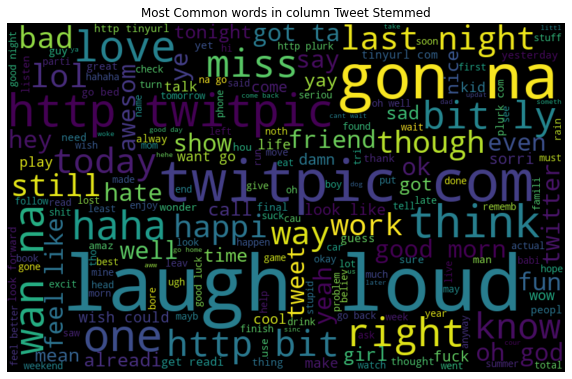

In [40]:
all_words_tweets = ' '.join([text for text in Twitter_Data['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

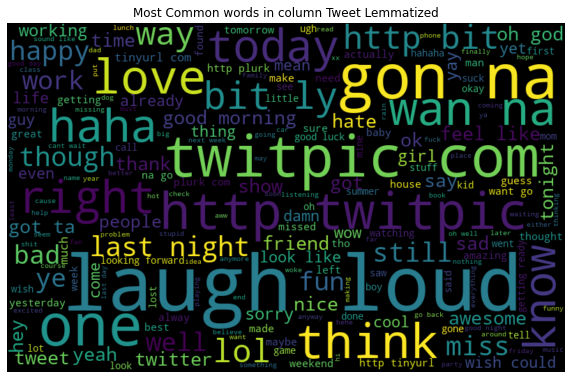

In [42]:
all_words_tweets = ' '.join([text for text in Twitter_Data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

### Count Vectorizing the tweets  

In [44]:
# load the libary 
from sklearn.feature_extraction.text import CountVectorizer
tweet_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tweet_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [46]:
stem = tweet_vectorizer.fit_transform(Twitter_Data['tweet_stemmed'])
stem

<1598314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6885785 stored elements in Compressed Sparse Row format>

In [47]:
lemm = tweet_vectorizer.fit_transform(Twitter_Data['tweet_lemmatized'])
lemm

<1598314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6470660 stored elements in Compressed Sparse Row format>

### TF-IDF Vecorizing the tweets

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [50]:
stem_tfidf= tfidf_vectorizer.fit_transform(Twitter_Data['tweet_stemmed'])
stem_tfidf

<1598314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6885785 stored elements in Compressed Sparse Row format>

In [51]:
lemm_tfidf= tfidf_vectorizer.fit_transform(Twitter_Data['tweet_lemmatized'])
lemm_tfidf

<1598314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6470660 stored elements in Compressed Sparse Row format>

### Preparing the Logistic Regression model

In [52]:
# load the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### Create a column of the value of the neative a positive tweet

In [54]:
# load the lib
from afinn import Afinn
afinn = Afinn(language='en')


In [55]:
# create affirn value based on the stemmed tweets
Twitter_Data['Affirn_value'] = Twitter_Data['tweet_stemmed'].apply(afinn.score)


In [56]:
# Create a label for the model based on the affirn value
Twitter_Data['label'] = Twitter_Data['Affirn_value'].apply(lambda x: 1 if x > 0 else 0)


### Train the model based on the stem count vectorizer and the affirn value label

In [58]:
train_bow = stem[:1598314,:]
test_bow = stem[1598314:,:]

# splitting data into training and validation set

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, Twitter_Data['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9596607716699652


### Train the model based on the stem tfidf and the affirn value label

In [59]:
train_bow = stem_tfidf[:1598314,:]
test_bow = stem_tfidf[1598314:,:]

# splitting data into training and validation set

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, Twitter_Data['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

0.9582088045502485


In [62]:
#The counter vectorizer had better accuracy than tfidf for the stem tweet! we decided to not use lem tweets because the accuracy is lower

### visualizing the non racists/ sexiest in the stem data using the wordcloud plot.


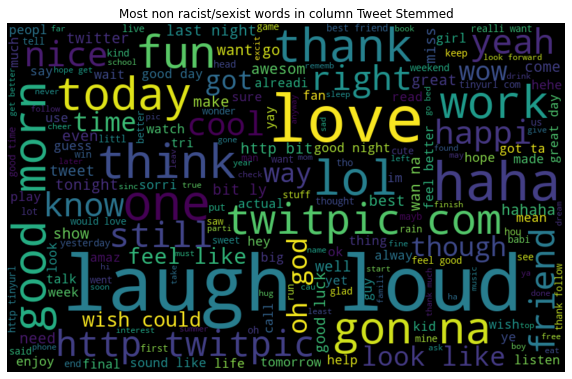

In [67]:
positive_words =' '.join([text for text in Twitter_Data['tweet_stemmed'][Twitter_Data['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

### visualizing the non racists/ sexiest in the Lemm using the wordcloud plot.


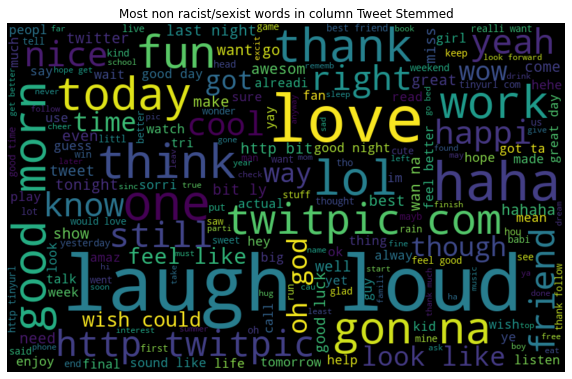

In [66]:
positive_words =' '.join([text for text in Twitter_Data['tweet_lemmatized'][Twitter_Data['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

### visualizing the racists/ sexiest in the stem using the wordcloud plot.

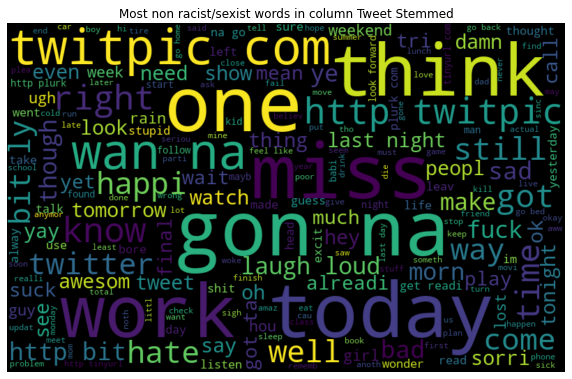

In [68]:
negative_words =' '.join([text for text in Twitter_Data['tweet_stemmed'][Twitter_Data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

### visualizing the most racists/ sexiest in the Lemm using the wordcloud plot.


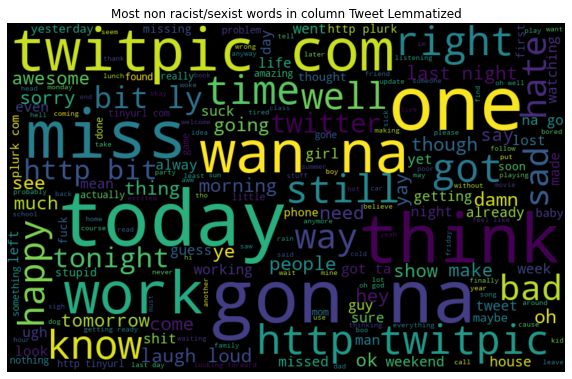

In [69]:
negative_words =' '.join([text for text in Twitter_Data['tweet_lemmatized'][Twitter_Data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()